## D'abord on importe tous les modules

In [47]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Exercice 1 : Analyse de la base de données “investment data”

## 1) Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [48]:
data = pd.read_csv('invest.txt', sep=" ", header=0)
data.head()


,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## 2) Réaliser le graphe suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

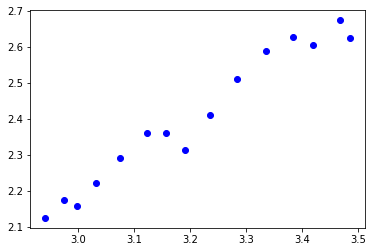

In [53]:
data['gnp_log_10'] = np.log10(data['gnp'])
data['invest_log_10'] = np.log10(data['invest'])
plt.plot(data['gnp_log_10'], data['invest_log_10'], 'bo')
plt.show()

In [50]:
data.head()

,year,gnp,invest,cpi,interest,gnp_log_10,invest_log_10
0,1968,873.4,133.3,82.54,5.16,2.941213,2.124830
1,1969,944.0,149.3,86.79,5.87,2.974972,2.174060
2,1970,992.7,144.2,91.45,5.95,2.996818,2.158965
3,1971,1077.6,166.4,96.01,4.88,3.032458,2.221153
4,1972,1185.9,195.0,100.00,4.50,3.074048,2.290035


## 3) Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible.

In [51]:
def calculate_cnos(x, y):
    all_x = data[x]
    all_y = data[y]

    x_mean = np.mean(all_x)
    y_mean = np.mean(all_y)

    # theta_1 = pente de la droite
    theta_1 = sum([((all_x[i] - x_mean) * (all_y[i] - y_mean)) for i in range(0, len(all_x))]
                ) / sum([((all_x[i] - x_mean) ** 2) for i in range(0, len(all_x))])

    # theta_0 = l’ordonnée à l’origine
    theta_0 = y_mean - theta_1 * x_mean

    return theta_0, theta_1

In [52]:
theta_0, theta_1 = calculate_cnos('gnp_log_10', 'invest_log_10')

print('theta 1: ' + str(round(theta_1, 2)) +
      ', theta 0: ' + str(round(theta_0, 2)))

theta 1: 1.02, theta 0: -0.85


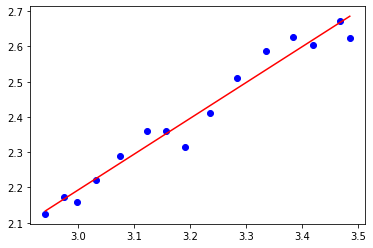

In [59]:
ols = theta_1 * data['gnp_log_10'] + theta_0

plt.plot(data['gnp_log_10'], data['invest_log_10'], 'bo')
plt.plot(data['gnp_log_10'], ols, 'r')
plt.show()
